# Analysis of the experimentation results

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
#! pip install --no-deps ydata_profiling
#! pip install --no-deps dacite
#! pip install --no-deps multimethod
#! pip install --no-deps visions
#! pip install --no-deps wordcloud
#! pip install --no-deps imagehash
#! pip install --no-deps htmlmin

In [3]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import json
from copy import deepcopy

# Load experimentation data
## Select case file

In [4]:
#file_errors_small  = 'errors_small_03022025_2.csv'
#file_results_small = 'results_small_03022025_2.csv'
#file_errors_small  = 'errors_small_04022025_1.csv'
#file_results_small = 'results_small_04022025_1.csv'
#file_errors_small  = 'errors_small_06022025_1.csv'
#file_results_small = 'results_small_06022025_1.csv'
#file_errors_small  = 'errors_small_07022025_1.csv'
#file_results_small = 'results_small_07022025_1.csv'
file_errors_small  = 'errors_window_mix.csv'
file_results_small = 'results_window_mix.csv'
#file_errors_small  = 'errors_small_10022025_2.csv'
#file_results_small = 'results_small_10022025_2.csv'
file_errors_small  = 'errors_small_11022025_2.csv'
file_results_small = 'results_small_11022025_2.csv'
file_errors_small  = 'errors_small_11022025_3.csv'
file_results_small = 'results_small_11022025_3.csv' ## Solo deterministics
file_errors_small  = 'errors_small_11022025_4.csv'
file_results_small = 'results_small_11022025_4.csv' ## Deterministic & seed solo en torch
file_errors_small  = 'errors_small_12022025_1.csv'
file_results_small = 'results_small_12022025_1.csv' ## Deterministic & seed solo en torch
file_errors_small  = 'errors_small_12022025_2.csv' # Recuperado seed
file_results_small = 'results_small_12022025_2.csv'
# --- Kohls
file_errors_small  = 'errors_small_14022025_2.csv' #R = 1e-4
file_results_small = 'results_small_14022025_2.csv'
file_errors_small  = 'errors_small_14022025_3.csv' #R = 1e-3
file_results_small = 'results_small_14022025_3.csv'
############################################################# SMALL
#file_errors_small  = 'errors_small_17022025_3.csv' # lr_find --- no conseguido # lr_optimizer
#file_results_small = 'results_small_17022025_3.csv'
#---- Base ---- #
#file_errors_small = 'errors_base_24022025_1.csv'
#file_results_small = 'results_base_24022025_1.csv'
#---- Large ----#
#file_errors_small = 'errors_large_24022025_1.csv'
#file_results_small = 'results_large_24022025_1.csv'

# S3
#file_errors_small  = 'errors_small_25022025_3.csv' 
#file_results_small = 'results_small_25022025_3.csv'

#dataset = "S3"
#version = "latest"
# S1
#file_errors_small  = 'errors_small_26022025_1' 
#file_results_small = 'results_small_26022025_1'

### SMALL -- Redone ###
#file_errors_small  = 'errors_small_03032025_1' 
#file_results_small = 'results_small_03032025_1'

dataset = "gtrends_kohls"
#version = "latest"
version = "v2"
### Checking what happens with DTW & segmentation
file_results_small = 'results_large_dtw_segmentation_1'
file_errors_small = 'errors_large_dtw_segmentation_2'

# -- Adding the last part of the file name. Take care with the first ones that did not include this part and may lie to errors
#file_errors_small = file_errors_small+dataset+version+".csv"
#file_results_small = file_results_small+dataset+version+".csv"

In [5]:
! ls {file_results_small}
! ls {file_errors_small}

results_large_dtw_segmentation_1
errors_large_dtw_segmentation_2


In [6]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [7]:
! tail 'errors_small_04022025_1.csv'

model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


In [8]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.tail())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


Total results: 21


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
16,small,20,0.2,0.75,5,59.806605,0.055410,0.084717,0.007269,0.049933,...,0.048730,0.150354,[12],[10],"[0.05540997546631843, 0.00279548418475315, 0.0...","{'loss': [0.05540997546631843], 'mse': [0.0847...","{'loss': [0.05468728936102707], 'mse': [0.0841...","([[0.05540997546631843, 0.00279548418475315, 0...",0.055410,0.054687
17,small,20,0.2,0.75,10,58.763639,0.055410,0.084717,0.007269,0.049933,...,0.048730,0.150354,[12],[10],"[0.05540997546631843, 0.00279548418475315, 0.0...","{'loss': [0.05540997546631843], 'mse': [0.0847...","{'loss': [0.05468728936102707], 'mse': [0.0841...","([[0.05540997546631843, 0.00279548418475315, 0...",0.055410,0.054687
18,small,20,0.3,0.25,1,91.007679,0.043559,0.074682,0.005709,0.046531,...,0.046545,0.144419,[12],[0],"[0.04355892325111199, 0.0037406502015073784, 0...","{'loss': [0.04355892325111199], 'mse': [0.0746...","{'loss': [0.04340560380660463], 'mse': [0.0745...","([[0.04355892325111199, 0.0037406502015073784,...",0.043559,0.043406
19,small,20,0.3,0.25,5,91.179777,0.043559,0.074682,0.005709,0.046531,...,0.046545,0.144419,[12],[0],"[0.04355892325111199, 0.0037406502015073784, 0...","{'loss': [0.04355892325111199], 'mse': [0.0746...","{'loss': [0.04340560380660463], 'mse': [0.0745...","([[0.04355892325111199, 0.0037406502015073784,...",0.043559,0.043406
20,small,20,0.3,0.25,10,91.168006,0.043559,0.074682,0.005709,0.046531,...,0.046545,0.144419,[12],[0],"[0.04355892325111199, 0.0037406502015073784, 0...","{'loss': [0.04355892325111199], 'mse': [0.0746...","{'loss': [0.04340560380660463], 'mse': [0.0745...","([[0.04355892325111199, 0.0037406502015073784,...",0.043559,0.043406


In [9]:
(0.006430488714078606-0.006421495916369809)*100/0.006430488714078606

0.13984625599463982

## Check losses

In [10]:
import re

In [11]:
def get_loss(x, pos = 0):
    loss_value = np.nan
    if isinstance(x, dict) and 'loss' in x:
        #print("Is dict")
        loss_value = x['loss']
    else: 
        #print("Look for a match")
        match = re.search(r"'loss':\s*([\d\.\-e]+|\[.*?\])", x)
        if match: 
            #print("Is match")
            loss_value = ast.literal_eval(match.group(1))
    if isinstance(loss_value, list) and len(loss_value) > 0:
        #print("Is list")
        loss_value = loss_value[0]
    return loss_value
    
    return np.nan 

In [12]:
#get_loss(results_small['eval_pre'][0])

In [13]:
def check_valid_losses(df, display_ = True):
    check              = df[['eval_pre', 'eval_post']].copy()
    check['loss_pre']  = df['eval_pre'].apply(lambda x: get_loss(x, 0))
    check['loss_post'] = df['eval_post'].apply(lambda x: get_loss(x, -1))
    #check['loss_pre']  = df['eval_pre'].apply(lambda x: ast.literal_eval(x)['loss'][0])
    #check['loss_post'] = df['eval_post'].apply(lambda x: ast.literal_eval(x)['loss'][0])
    check['pre_less_than_post']    = check['loss_pre'] > check['loss_post']
    check['absolute_difference']   = check['loss_pre'] - check['loss_post']
    check['percentage_difference'] = (check['absolute_difference'] * 100 / check['loss_pre'])
    check_filtered = check[check['loss_post'] > check['loss_pre']]
    if display_: display(check_filtered)
    summary = {
        "total_cases": len(check_filtered),
        "mean_absolute_difference": check_filtered['absolute_difference'].mean(),
        "mean_percentage_difference": check_filtered['percentage_difference'].mean(),
        "max_absolute_difference": check_filtered['absolute_difference'].max(),
        "max_percentage_difference": check_filtered['percentage_difference'].max(),
        "min_absolute_difference": check_filtered['absolute_difference'].min(),
        "min_percentage_difference": check_filtered['percentage_difference'].min(),
    }
    return check['percentage_difference']

In [14]:
def check(id):
    print((results_small['loss_pre'][id][0]-results_small['loss_post'][id][0])*100/results_small['loss_post'][id][0])

## Preprocess

### Utils

In [15]:
def safe_eval(x, key):
    val = np.nan
    if isinstance(x, dict):
        val = x
    else: 
        if isinstance(x, str) and x.startswith("{") and x.endswith("}"):
            # Reemplazamos:
            # - comillas simples por dobles, para formar un JSON válido
            # - 'nan' por 'null', en caso de que aparezca
            x_mod = x.replace("'", '"').replace("nan", "null")
            try:
                val = json.loads(x_mod)[key]
            except json.JSONDecodeError as e:
                print("Error parsing ", x)
                print("Error details: ", e)
                raise e
    return val

In [16]:
def improvement_percentage(pre, post):
    return [(pre_val-p)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [17]:
def get_last(x):
    try:
        return ast.literal_eval(x)[-1]
    except:
        return x[-1]
def get_pos_last(x):
    try: 
        return get_pos(ast.literal_eval(x),-1)
    except:
        return get_pos(x,-1)

In [18]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

### Format & extract

In [19]:
results_small['windows']    = results_small['windows'].apply(lambda x: list(set(x)))
results_small['loss_pre']   = results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))
results_small['loss_post']  = results_small["eval_post"].apply(lambda x: safe_eval(x, 'loss'))
results_small["best_epoch"] =  results_small["best_epochs"].apply(lambda x: get_last(x))

In [20]:
check(0)
#check(10)
#check(50)

-0.013772185359604458


### Build improvement (from losses)

In [21]:
results_small['improvement'] = check_valid_losses(results_small, True)

,eval_pre,eval_post,loss_pre,loss_post,pre_less_than_post,absolute_difference,percentage_difference
0,"{'loss': [0.04355892325111199], 'mse': [0.0746...","{'loss': [0.04356492309307214], 'mse': [0.0746...",0.043559,0.043565,False,-0.000006,-0.013774
1,"{'loss': [0.04355892325111199], 'mse': [0.0746...","{'loss': [0.04356492309307214], 'mse': [0.0746...",0.043559,0.043565,False,-0.000006,-0.013774
2,"{'loss': [0.04355892325111199], 'mse': [0.0746...","{'loss': [0.04356492309307214], 'mse': [0.0746...",0.043559,0.043565,False,-0.000006,-0.013774


In [22]:
print("Min: ", min(results_small["improvement"]))
print("Max: ", max(results_small["improvement"]))
print("Mean: ", np.mean(results_small["improvement"]))

Min:  -0.013774082351757528
Max:  1.9130501003306648
Mean:  0.8822643975090279


## Build profile df

In [23]:
profile_small_df = results_small[[
    "time", 
    "best_epoch", 
    "dataset_percent", 
    "masked_percent", 
    "n_windows", 
    "improvement"
]].copy()

In [24]:
results_small["last_best_epoch"] = results_small["best_epochs"].apply(lambda x: get_pos_last(x))

## Check best improvements

In [25]:
from IPython.display import FileLink
from IPython.display import HTML, display

In [26]:
def plot_improvement(profile_df, save_path="improvements", titlesize=16, title="Improvement per case", save=True):
    """
    Generates a line plot for improvement per case and allows saving the image in SVG/PDF format.

    Parameters:
    - profile_df: DataFrame containing the 'improvement' column to plot.
    - save_path: Base filename for saving the output (without extension).
    - titlesize: Font size for the title and labels.
    - title: Title of the plot.
    - save: Boolean indicating whether to save the plot as SVG/PDF.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(profile_df["improvement"], linewidth=2)

    # Adjust title and labels
    plt.title(title, fontsize=titlesize, pad=15)
    plt.xlabel("Case ID", fontsize=titlesize * 0.85, labelpad=10)
    plt.ylabel("Improvement", fontsize=titlesize * 0.85, labelpad=10)
    plt.xticks(fontsize=titlesize * 0.75)
    plt.yticks(fontsize=titlesize * 0.75)

    # Save the figure if requested
    if save:
        plt.savefig(f"{save_path}.svg", format='svg', transparent=True, dpi=300, bbox_inches='tight')
        plt.savefig(f"{save_path}.pdf", format='pdf', bbox_inches='tight')

        # Display interactive download links
        display(HTML(f'<a href="{save_path}.svg" download="{save_path}.svg">Download SVG</a>'))
        display(HTML(f'<a href="{save_path}.pdf" download="{save_path}.pdf">Download PDF</a>'))

    # Show the plot
    plt.show()

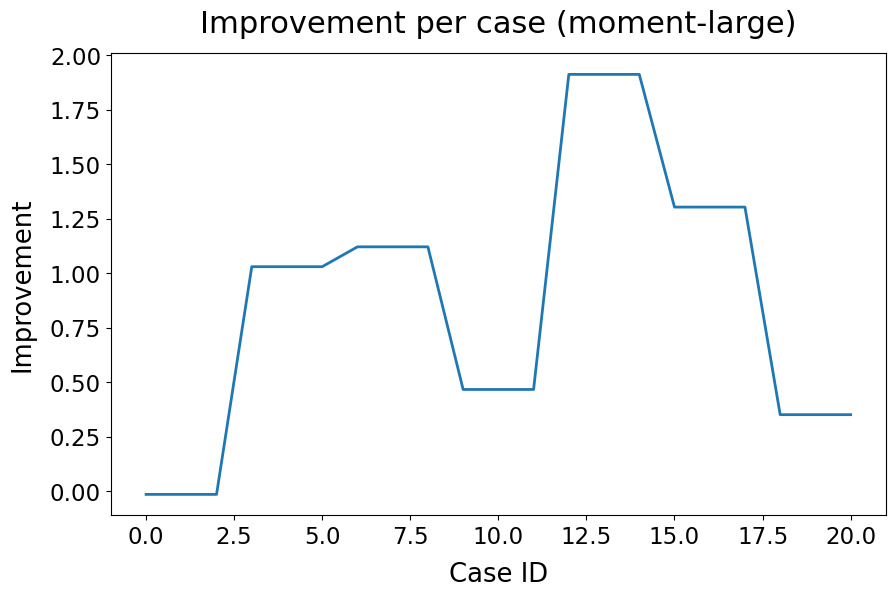

In [27]:
#save = True
#imp = profile_small_df['improvement'].plot(title="Improvement per case").get_figure()
#if save:
#    imp.savefig("improvements.svg", transparent=True, dpi=300, format='svg')
#    display(HTML('<a href="improvements.svg" download="improvements.svg">Descargar SVG</a>'))
# Mostrar el gráfico
#plt.show()
plot_improvement(profile_df = profile_small_df, titlesize=22, title="Improvement per case (moment-large)")

In [28]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,60.269860,19,0.2,0.50,1,1.913050
13,58.454916,19,0.2,0.50,5,1.913050
14,58.051930,19,0.2,0.50,10,1.913050
15,60.191717,10,0.2,0.75,1,1.304253
16,59.806605,10,0.2,0.75,5,1.304253


In [29]:
#display(results_small.iloc[109])

In [30]:
profile_small_df[profile_small_df["time"] < 8 ].shape

(0, 6)

In [31]:
display(profile_small_df.sort_values('improvement', ascending = False)[:10])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,60.269860,19,0.20,0.50,1,1.913050
13,58.454916,19,0.20,0.50,5,1.913050
14,58.051930,19,0.20,0.50,10,1.913050
15,60.191717,10,0.20,0.75,1,1.304253
16,59.806605,10,0.20,0.75,5,1.304253
17,58.763639,10,0.20,0.75,10,1.304253
7,46.910594,9,0.15,0.75,5,1.121928
8,46.841149,9,0.15,0.75,10,1.121928
6,47.180964,9,0.15,0.75,1,1.121928
4,48.349327,14,0.15,0.50,5,1.030854


In [32]:
print("--------------------- All dataset percent -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
print("--------------------- Ensure dataset percent <= 0.25 -----------------")
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- All dataset percent -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,60.269860,19,0.2,0.50,1,1.913050
13,58.454916,19,0.2,0.50,5,1.913050
14,58.051930,19,0.2,0.50,10,1.913050
15,60.191717,10,0.2,0.75,1,1.304253
16,59.806605,10,0.2,0.75,5,1.304253


--------------------- Ensure dataset percent <= 0.25 -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
12,60.269860,19,0.2,0.50,1,1.913050
13,58.454916,19,0.2,0.50,5,1.913050
14,58.051930,19,0.2,0.50,10,1.913050
15,60.191717,10,0.2,0.75,1,1.304253
16,59.806605,10,0.2,0.75,5,1.304253


# Check Linear correlation 

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset

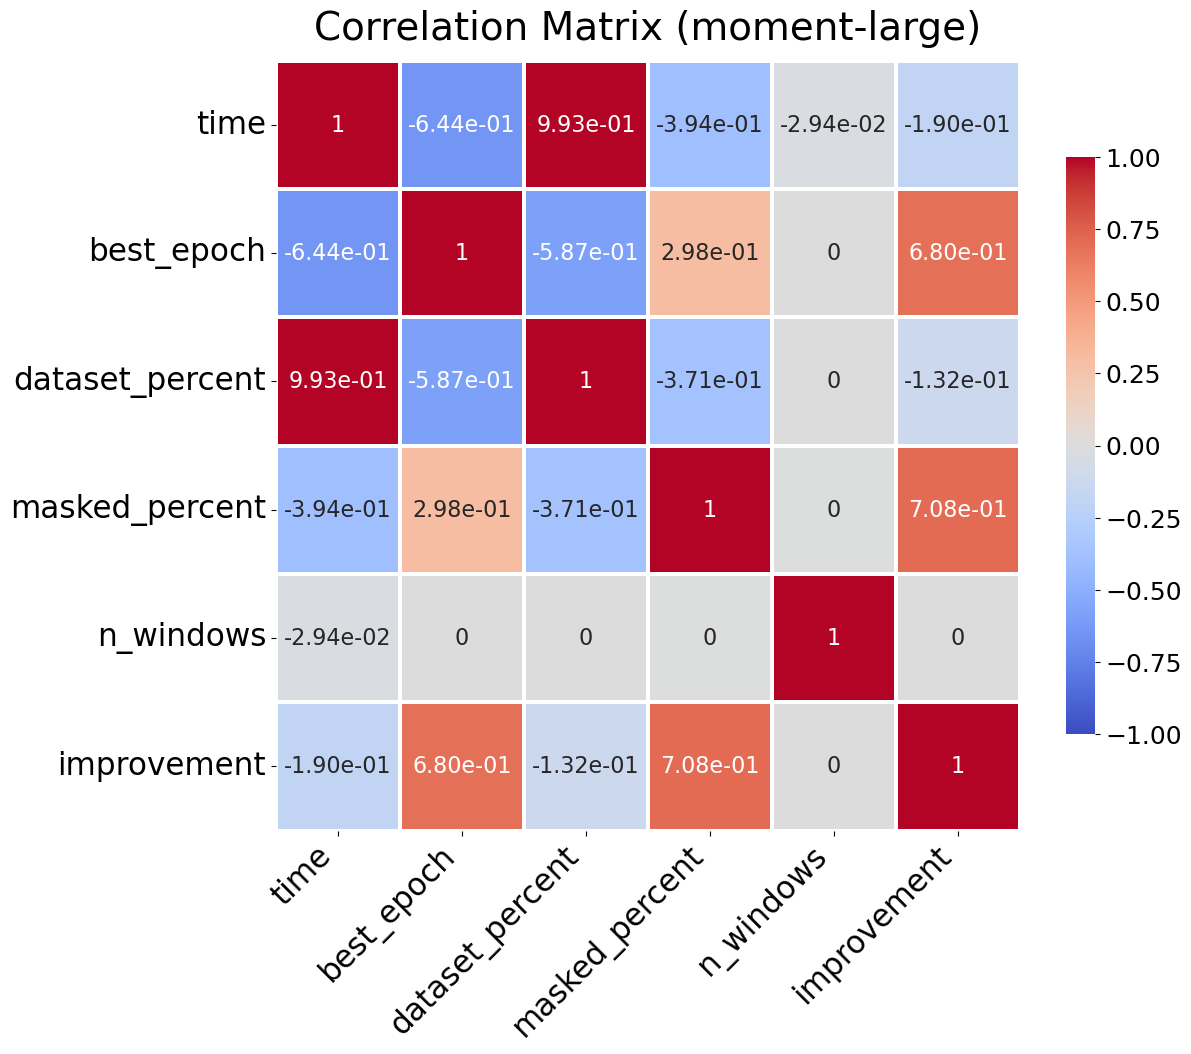

In [33]:
# Convert values to scientific notation if they exceed 4 decimal places
def format_value(val, epsilon=1e-3):
    """Formats values for the heatmap to correctly display integers, decimals, and scientific notation."""
    if (abs(val - round(val)) < epsilon):  
        return f"{round(val)}"  # Display whole numbers without decimals
    elif (abs(val) < 0.0001 or (abs(val)) > 0 and abs(val) < 1 and len(str(val).split(".")[1].rstrip("0")) > 4):  
        return f"{val:.2e}"  # Use scientific notation for small numbers or more than 4 decimals
    else:  
        return f"{val:.4f}"  # Display up to 4 decimal places otherwise
        
def plot_correlation(
    profile, figsize=(8, 6), save_path="correlation", titlesize=16, 
    title="Correlation Matrix", annot_size=12, legend_size=14):
    """
    Generates a heatmap of the correlation matrix and allows saving the image in SVG/PDF format.

    Parameters:
    - profile: DataFrame containing the data to compute the correlation.
    - figsize: Size of the figure.
    - save_path: Base filename for saving the output (without extension).
    - titlesize: Font size for the title and labels.
    - title: Title of the plot.
    - annot_size: Font size for the numbers inside the heatmap.
    - legend_size: Font size for the color bar (legend).
    """
    correlation_matrix = profile.corr()

    formatted_matrix = correlation_matrix.applymap(format_value)

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        correlation_matrix, annot=formatted_matrix, cmap='coolwarm', center=0, vmin=-1, vmax=1, 
        linewidths=1.5, linecolor="white", fmt="", cbar_kws={'shrink': 0.75},
        annot_kws={"size": annot_size}  # Increase font size of annotations
    )

    # Increase the font size of the color bar (legend)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=legend_size)

    # Adjust title and labels
    plt.title(title, fontsize=titlesize, pad=15)
    plt.xticks(fontsize=titlesize * 0.8, rotation=45, ha="right")
    plt.yticks(fontsize=titlesize * 0.8, rotation=0)

    # Save the figure in SVG and PDF format
    plt.savefig(f"{save_path}.svg", format='svg', transparent=True, bbox_inches='tight')
    plt.savefig(f"{save_path}.pdf", format='pdf', bbox_inches='tight')

    # Display interactive download links
    display(HTML(f'<a href="{save_path}.svg" download="{save_path}.svg">Download SVG</a>'))
    display(HTML(f'<a href="{save_path}.pdf" download="{save_path}.pdf">Download PDF</a>'))

    plt.show()


            
# Example usage:
plot_correlation(
    profile_small_df, 
    figsize=(12,10), save_path="correlation", 
    titlesize=28, 
    annot_size=16, 
    legend_size=18,
    title = "Correlation Matrix (moment-large)"
)


In [34]:
profile_small_df.corr()

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
time,1.000000,-6.437056e-01,9.931479e-01,-3.936536e-01,-2.937836e-02,-1.904415e-01
best_epoch,-0.643706,1.000000e+00,-5.871922e-01,2.983535e-01,-1.721740e-17,6.801239e-01
dataset_percent,0.993148,-5.871922e-01,1.000000e+00,-3.713053e-01,8.704843e-17,-1.315205e-01
masked_percent,-0.393654,2.983535e-01,-3.713053e-01,1.000000e+00,-6.895263e-17,7.075009e-01
n_windows,-0.029378,-1.721740e-17,8.704843e-17,-6.895263e-17,1.000000e+00,-3.787158e-17
improvement,-0.190441,6.801239e-01,-1.315205e-01,7.075009e-01,-3.787158e-17,1.000000e+00


In [35]:
def format_value(val, epsilon=1e-3):
    """Formats values for the heatmap to correctly display integers, decimals, and scientific notation."""
    if (abs(val - round(val)) < epsilon):  
        print("op1")
        return f"{round(val)}"  # Display whole numbers without decimals
    elif (abs(val) < 0.0001 or (abs(val)) > 0 and abs(val) < 1 and len(str(val).split(".")[1].rstrip("0")) > 4):  
        print("op2")
        return f"{val:.2e}"  # Use scientific notation for small numbers or more than 4 decimals
    else:  
        print("op3")
        return f"{val:.4f}"  # Display up to 4 decimal places otherwise
        
val = profile_small_df.corr()['time'][2]
print(val)
print(round(val))
print(val-round(val))
format_value(val)

0.9931479274312699
1
-0.006852072568730105
op2


'9.93e-01'

In [36]:
results_small["best_epochs"][:10]

0     [9]
1     [9]
2     [9]
3    [14]
4    [14]
5    [14]
6     [9]
7     [9]
8     [9]
9    [11]
Name: best_epochs, dtype: object

In [37]:
results_small["best_epochs"] = results_small["best_epochs"].apply(lambda x: ast.literal_eval(x))

In [38]:
results_small["best_epochs"][0][0]

9

In [39]:
all_epochs = [epoch for sublist in results_small["best_epochs"] for epoch in sublist]
print("pre")
print(all_epochs)
all_epochs = [x for x in all_epochs if isinstance(x, int)]
print("post")
print(all_epochs)

pre
[9, 9, 9, 14, 14, 14, 9, 9, 9, 11, 11, 11, 19, 19, 19, 10, 10, 10, 0, 0, 0]
post
[9, 9, 9, 14, 14, 14, 9, 9, 9, 11, 11, 11, 19, 19, 19, 10, 10, 10, 0, 0, 0]


In [40]:
def epoch_frequencies(all_epochs, save=True, titlesize=16, save_path="best_epochs", title_suffix=""):
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()

    print("\n--- Epoch Counts (Ordenados) ---")
    print(epoch_counts)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(epoch_counts.index, epoch_counts.values, color="#4682B4")  # Default color (SteelBlue)

    # Obtener las frecuencias únicas en orden descendente
    unique_frequencies = sorted(epoch_counts.unique(), reverse=True)

    print("\n--- Frecuencias únicas ordenadas ---")
    print(unique_frequencies)

    # Seleccionar las dos frecuencias más altas
    if len(unique_frequencies) > 1:
        top_frequencies = unique_frequencies[:2]  # Tomar las dos mayores frecuencias
    else:
        top_frequencies = unique_frequencies  # Si solo hay una frecuencia, usar esa

    print("\n--- Dos frecuencias más altas seleccionadas ---")
    print(top_frequencies)

    # Obtener todos los índices con la máxima frecuencia
    max_freq_epochs = epoch_counts[epoch_counts == top_frequencies[0]].index

    # Seleccionar los dos valores más altos de la máxima frecuencia
    top_highest_epochs = sorted(max_freq_epochs, reverse=True)[:2]

    # Si solo hay un valor en la máxima frecuencia, agregar el más alto de la segunda frecuencia
    if len(top_highest_epochs) < 2 and len(top_frequencies) > 1:
        second_freq_epochs = epoch_counts[epoch_counts == top_frequencies[1]].index
        highest_second_freq = max(second_freq_epochs)  # Obtener el más alto
        top_highest_epochs.append(highest_second_freq)

    print("\n--- Épocas seleccionadas para resaltar ---")
    print(top_highest_epochs)

    # Resaltar solo las épocas seleccionadas
    for bar, epoch in zip(bars, epoch_counts.index):
        if epoch in top_highest_epochs:
            bar.set_color("#FF4500")  # Highlight color (OrangeRed)
            print(f"Resaltando época {epoch} con frecuencia {epoch_counts[epoch]}")

    # Ajustar título y etiquetas
    plt.title(f"Best epoch frequency {title_suffix}", fontsize=titlesize, pad=15)
    plt.xlabel("Best epoch", fontsize=titlesize * 0.85, labelpad=10)
    plt.ylabel("Frequency", fontsize=titlesize * 0.85, labelpad=10)
    plt.xticks(epoch_counts.index, fontsize=titlesize * 0.75)
    plt.yticks(fontsize=titlesize * 0.75)

    # Guardar la figura si se solicita
    if save:
        plt.savefig(f"{save_path}.svg", format='svg', transparent=True, bbox_inches='tight')
        plt.savefig(f"{save_path}.pdf", format='pdf', bbox_inches='tight')

        # Mostrar enlaces de descarga
        display(HTML(f'<a href="{save_path}.svg" download="{save_path}.svg">Download SVG</a>'))
        display(HTML(f'<a href="{save_path}.pdf" download="{save_path}.pdf">Download PDF</a>'))

    plt.show()



--- Epoch Counts (Ordenados) ---
0     3
9     6
10    3
11    3
14    3
19    3
dtype: int64

--- Frecuencias únicas ordenadas ---
[6, 3]

--- Dos frecuencias más altas seleccionadas ---
[6, 3]

--- Épocas seleccionadas para resaltar ---
[9, 19]
Resaltando época 9 con frecuencia 6
Resaltando época 19 con frecuencia 3


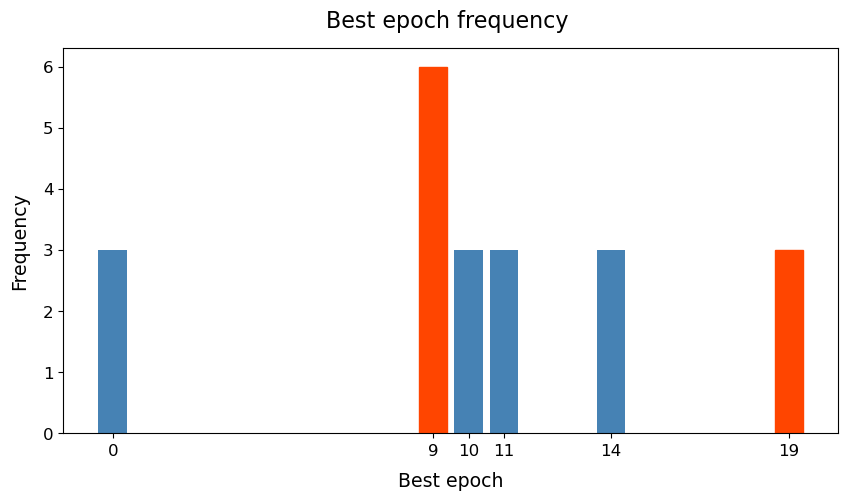

In [41]:
epoch_frequencies(all_epochs)

# Check feature relevance with other techniques
## Sklearn feature relevance analysis

### SelectKBest

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import pandas as pd

def select_k_best_features(df, target_column, k='all'):
    """
    Select the best features using SelectKBest and f_regression.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    
    scores = selector.scores_
    feature_importance = scores / np.sum(scores)  # Normalize scores
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'SelectKBest_Score': scores,
        'SelectKBest_Percentage': feature_importance * 100
    })
    
    return importance_df.sort_values(by='SelectKBest_Percentage', ascending=False)


### Random forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(df, target_column):
    """
    Compute feature importance using a RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    rf_importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'RandomForest_Importance': rf_importances * 100
    })
    
    return importance_df.sort_values(by='RandomForest_Importance', ascending=False)


### Check cmbined feature importance

In [44]:
def analyze_feature_importance(df, target_column, k='all'):
    """
    analyze feature importance using both SelectKBest and RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Combined feature importance scores sorted in descending order.
    """
    k_best_df = select_k_best_features(df, target_column, k)
    rf_df = random_forest_feature_importance(df, target_column)
    
    combined_df = pd.merge(k_best_df, rf_df, on='Feature', how='outer')
    return combined_df.sort_values(by='RandomForest_Importance', ascending=False)


In [45]:
results_small["best_epochs"][0][0]

9

In [46]:
df = profile_small_df[["masked_percent", "n_windows", "dataset_percent", "improvement"]].copy()
df["best_epoch"] = results_small["best_epochs"].apply(lambda x: x[0])
df_feat = df [ df [ "masked_percent" ]  < 1 ]
df_feat = df_feat [ df_feat [ "masked_percent" ]  > 0 ]
df_feat = df_feat [ df_feat [ "dataset_percent" ]  < 1 ]
df_feat[:5]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
0,0.25,1,0.15,-0.013774,9
1,0.25,5,0.15,-0.013774,9
2,0.25,10,0.15,-0.013774,9
3,0.50,1,0.15,1.030854,14
4,0.50,5,0.15,1.030854,14


In [47]:
df_feat[pd.isna(df_feat["improvement"])]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [48]:
result = analyze_feature_importance(df_feat, target_column="improvement")
display(result)

,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
0,masked_percent,1.904242e+01,5.329501e+01,76.679417
1,best_epoch,1.635335e+01,4.576897e+01,17.702815
2,dataset_percent,3.344402e-01,9.360152e-01,5.592479
3,n_windows,5.341171e-30,1.494861e-29,0.025289


In [49]:
def count_epoch(df):
    all_epochs = df["best_epoch"]
    print(all_epochs.unique)
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

<bound method Series.unique of 0      9
1      9
2      9
3     14
4     14
5     14
6      9
7      9
8      9
9     11
10    11
11    11
12    19
13    19
14    19
15    10
16    10
17    10
18     0
19     0
20     0
Name: best_epoch, dtype: int64>


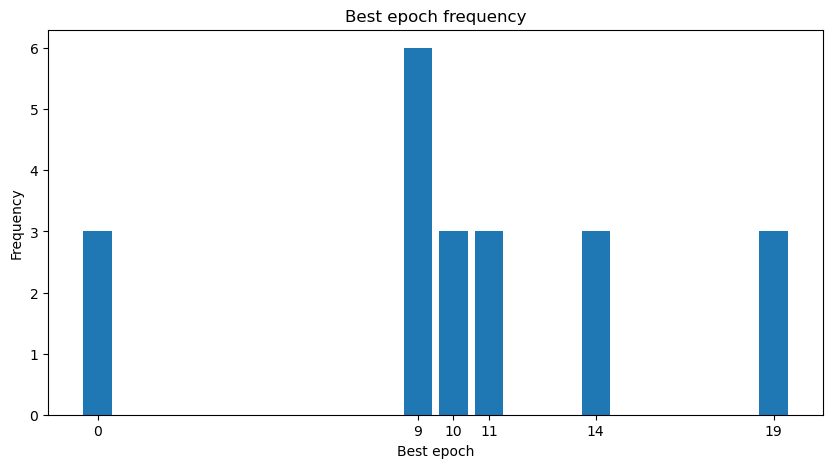

In [50]:
count_epoch(df_feat)

# Best option

In [51]:
def best_combination_for_improvement(df, target_column, importance_df):
    """
    A partir del análisis de importancia (importance_df), selecciona las dos variables 
    más relevantes (según el promedio de SelectKBest_Percentage y RandomForest_Importance). 
    Para cada una, obtiene el valor que da mayor improvement (promedio del target).
    Luego, filtra el DataFrame a esos casos y, en ese subconjunto, para cada variable restante,
    obtiene el valor que maximiza el improvement.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame de entrada.
    target_column : str
        Nombre de la variable objetivo (por ejemplo, "improvement").
    importance_df : pd.DataFrame
        DataFrame resultante de analyze_feature_importance, que debe contener las columnas 
        'Feature', 'SelectKBest_Percentage' y 'RandomForest_Importance'.
    
    Returns:
    --------
    best_values : dict
        Diccionario con para cada variable (tanto las top2 como las restantes) el valor óptimo.
    avg_impr : float or None
        Promedio de improvement en el subconjunto filtrado (puede ser None si no hay casos).
    """
    # Calcular la importancia promedio de cada feature
    importance_df = importance_df.copy()
    importance_df["AvgImportance"] = (importance_df["SelectKBest_Percentage"] + importance_df["RandomForest_Importance"]) / 2
    
    # Ordenar y seleccionar las dos variables más relevantes
    top_features = importance_df.sort_values(by="AvgImportance", ascending=False)["Feature"].tolist()
    top2 = top_features[:2]
    
    best_values = {}
    
    # Para cada una de las dos variables más importantes, obtener el valor que genera mayor improvement.
    for feat in top2:
        # Agrupamos por la variable y calculamos el promedio de improvement para cada valor
        grouped = df.groupby(feat)[target_column].mean().reset_index()
        # Seleccionamos el valor cuyo promedio de improvement es mayor
        best_row = grouped.loc[grouped[target_column].idxmax()]
        best_values[feat] = best_row[feat]
    
    # Filtrar el DataFrame a los casos en que las dos variables toman esos valores
    filtered_df = df.copy()
    for feat, val in best_values.items():
        filtered_df = filtered_df[filtered_df[feat] == val]
    
    # Para el resto de las variables (excluyendo las dos top y el target), buscar el valor que dentro
    # del subconjunto filtrado genere el mayor improvement
    remaining_features = [feat for feat in df.columns if feat not in top2 and feat != target_column]
    for feat in remaining_features:
        grouped = filtered_df.groupby(feat)[target_column].mean().reset_index()
        if len(grouped) > 0:
            best_row = grouped.loc[grouped[target_column].idxmax()]
            best_values[feat] = best_row[feat]
        else:
            best_values[feat] = None  # En caso de no haber datos suficientes
    
    # También se puede obtener el improvement promedio en los casos filtrados por las dos variables top
    if len(filtered_df) > 0:
        avg_impr = filtered_df[target_column].mean()
    else:
        avg_impr = None
    
    return best_values, avg_impr


In [52]:
feature_importance = analyze_feature_importance(df_feat, target_column="improvement")
display(feature_importance)
best_vals, avg_improvement = best_combination_for_improvement(df_feat, target_column="improvement", importance_df=feature_importance)

print("Mejor combinación de valores:")
for feat, val in best_vals.items():
    print(f"{feat}: {val}")

print(f"\nImprovement promedio en el subconjunto de las top2: {avg_improvement}")


,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
0,masked_percent,1.904242e+01,5.329501e+01,76.679417
1,best_epoch,1.635335e+01,4.576897e+01,17.702815
2,dataset_percent,3.344402e-01,9.360152e-01,5.592479
3,n_windows,5.341171e-30,1.494861e-29,0.025289


Mejor combinación de valores:
masked_percent: 0.5
best_epoch: 19.0
n_windows: 1.0
dataset_percent: 0.2

Improvement promedio en el subconjunto de las top2: 1.9130501003306648


In [53]:
#final = df_feat[ df_feat["n_windows"] == 4].copy()
final = df_feat[ df_feat["dataset_percent"] == 0.15].copy()
#final = final[ final ["masked_percent"] == 0.5]
final = final [ final [ "best_epoch" ] == 6]
final

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [54]:
final

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [55]:
#! pip install optuna

In [56]:
! pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna.visualization as vis
import shap
import optuna
import warnings

In [58]:
class FeatureImportanceanalyzer:
    def __init__(self, df, target_column, k='all', show_values=True, columns=None, verbose = 0):
        self.df = df
        self.target_column = target_column
        self.X = df.drop(columns=[target_column])
        self.y = df[target_column]
        self.k = k
        self.show_values = show_values
        self.columns = columns if columns else [
            'RandomForest_Importance_pcnt', 
            'SelectKBest__pcnt', 
            'SHAP_Impact_pcnt', 
            'Correlation_pcnt'
        ]
        self.importance_df = None
        self.study = None # Optuna's study object
        self.verbose = verbose

    def compute_random_forest_importance(self):
        rf = RandomForestRegressor(n_estimators = 100, random_state=42)
        rf.fit(self.X, self.y)
        rf_importances = rf.feature_importances_
        return pd.DataFrame({'Feature': self.X.columns, 'RandomForest_Importance_pcnt': rf_importances*100})

    def compute_select_kbest_importance(self):
        selector = SelectKBest(score_func=f_regression, k=self.k)
        selector.fit(self.X, self.y)
        scores = selector.scores_
        importances = scores / np.sum(scores) # Normalize the scores
        
        return pd.DataFrame({'Feature': self.X.columns, 'SelectKBest__pcnt': importances*100})

    def compute_correlations(self):
        correlations = self.X.corrwith(self.y)
        return pd.DataFrame({'Feature': self.X.columns, 'Correlation_pcnt': correlations*100})

    def compute_shap_impact(self):
        model = RandomForestRegressor(random_state=42)
        model.fit(self.X, self.y)
        explainer   = shap.TreeExplainer(model, self.X)
        shap_values = explainer(self.X)
        mean_shap   = np.abs(shap_values.values).mean(axis=0)
        y_range = self.y.max()-self.y.min()
        #shap.plots.waterfall(shap_values[1])
        shap.plots.beeswarm(shap_values)
        return pd.DataFrame({'Feature': self.X.columns, 'SHAP_Impact_pcnt': mean_shap*100/y_range})

    def combine_importances(self):
        rf_df = self.compute_random_forest_importance()
        kbest_df = self.compute_select_kbest_importance()
        corr_df = self.compute_correlations()
        shap_df = self.compute_shap_impact()
        self.importance_df = pd.merge(
            pd.merge(
                pd.merge(rf_df, kbest_df, on='Feature'), 
                corr_df, on='Feature'
            ), 
            shap_df, on='Feature'
        )
        self.importance_df = self.importance_df.sort_values(
            by='RandomForest_Importance_pcnt', 
            ascending=False
        )

    def style_table(self):
        styled_df = self.importance_df[['Feature'] + self.columns]
        styled = styled_df.style.hide(axis="index")
        styled = styled_df.style.hide(axis="index")
        for col in self.columns:
            styled = styled.bar(
                subset= [col], 
                vmin  = -styled_df[col].abs().max(), 
                vmax  = styled_df[col].abs().max(), 
                height= 50, 
                cmap='RdYlGn',
                props='border-radius: 5px;'
            )

        
        styled = styled.set_properties(**{'text-align': 'center'})
        styled = styled.set_properties(**{'border-radius': '5px'})

        if not self.show_values:
            styled = styled.format({col: "" for col in self.columns})

        return styled

    def analyze(self):
        self.combine_importances()
        return self.style_table()
    def _aditional_params(self, trial):
        additional_params = {}
        for col in self.X.columns:
            if col.startswith('n_') or col.startswith('num'):
                value = trial.suggest_int(col, int(self.X[col].min()), int(self.X[col].max()))
            else:
                value = trial.suggest_float(col, float(self.X[col].min()), float(self.X[col].max()))
            additional_params[col] = value
        return additional_params

    def _objective_params(self, trial):
        # Model parameters
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        # Aditional parameters 
        additional_params = self._aditional_params(trial)
        params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth, 
            **additional_params
        }
        return params
    def objective_old(self, trial):
        """ Definir la función objetivo de Optuna para maximizar la variable 'improvement' """
        model_params = self._objective_params(trial)
        
        X_train, X_valid, y_train, y_valid = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(**model_params, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, y_pred)
        return -mse # Maximize 'improvement'

    def objective(self, trial):
        # Variables del dataset
        masked_percent = trial.suggest_float('masked_percent', 0, 1)
        n_windows = trial.suggest_int('n_windows', 1, 10)
        dataset_percent = trial.suggest_float('dataset_percent', 0, 1)
        best_epoch = trial.suggest_int('best_epoch', 1, 10)
    
        # Añadir las variables sugeridas a los datos
        df_trial = df.copy()
        df_trial['masked_percent'] = masked_percent
        df_trial['n_windows'] = n_windows
        df_trial['dataset_percent'] = dataset_percent
        df_trial['best_epoch'] = best_epoch
    
        # Dividir los datos en entrenamiento y prueba
        #X = df_trial.drop('improvement', axis=1)
        #y = df_trial['improvement']
        #X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

        # Entrenamos un modelo
        model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        model.fit(X_train, y_train)
    
        # Evaluación
        y_pred = model.predict(X_valid)   
        return y_pred

    
    def create_study(self, direction = 'minimize'):
        """ Crear un estudio de Optuna """
        if self.verbose < 1:
            warnings.filterwarnings("ignore", category=UserWarning, module='optuna')
        self.study = optuna.create_study(direction=direction) 
        self.study.optimize(self.objective, n_trials=100) 
    def results_plot(self):
        """ Mostrar los resultados del estudio en un gráfico de coordenadas paralelas """
        if self.study is not None:
            print("Printing self.study plot parallel coordinate")
            return vis.plot_parallel_coordinate(self.study)
        else:
            print("self.study is None")
            return None
    def study_importances_plot(self):
        if self.study is not None:
            return vis.plot_param_importances(self.study, target = self.y)

In [59]:
analyzer = FeatureImportanceanalyzer(
    df_feat, 
    'improvement', 
    k='all', 
    show_values=True, 
    columns=[
        'RandomForest_Importance_pcnt', 
        'SelectKBest__pcnt', 
        'SHAP_Impact_pcnt', 
        'Correlation_pcnt'
    ]
)

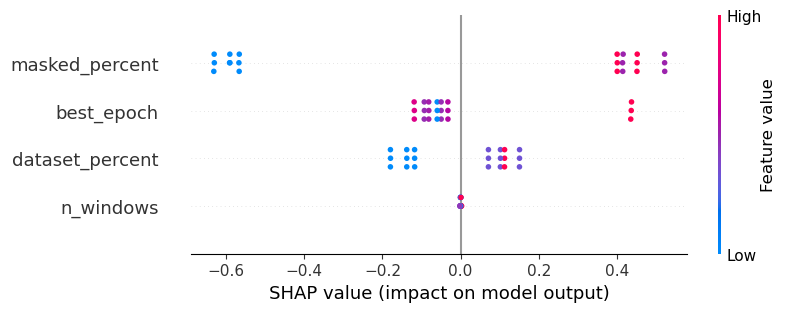

Feature,RandomForest_Importance_pcnt,SelectKBest__pcnt,SHAP_Impact_pcnt,Correlation_pcnt
masked_percent,76.679417,53.295014,26.503709,70.750089
best_epoch,17.702815,45.768971,6.464023,68.012394
dataset_percent,5.592479,0.936015,6.452242,-13.152049
n_windows,0.025289,0.000000,0.045149,0.000000


In [60]:
result = analyzer.analyze()
result

In [61]:
#! pip install cairosvg

In [62]:
#Not that easy to save..
#import cairosvg
#html_path = "feature_importances.html"
#svg_path = "feature_importances.svg"
#html_str = result.render()

#with open(html_path, "w", encoding="utf-8") as f:
#    f.write(html_str)

#cairosvg.svg2svg(url=html_path, write_to=svg_path)
#display(HTML(f'<a href="{svg_path}" download="feature_importances.svg">Descargar SVG</a>'))

In [63]:
from pandas.plotting import parallel_coordinates

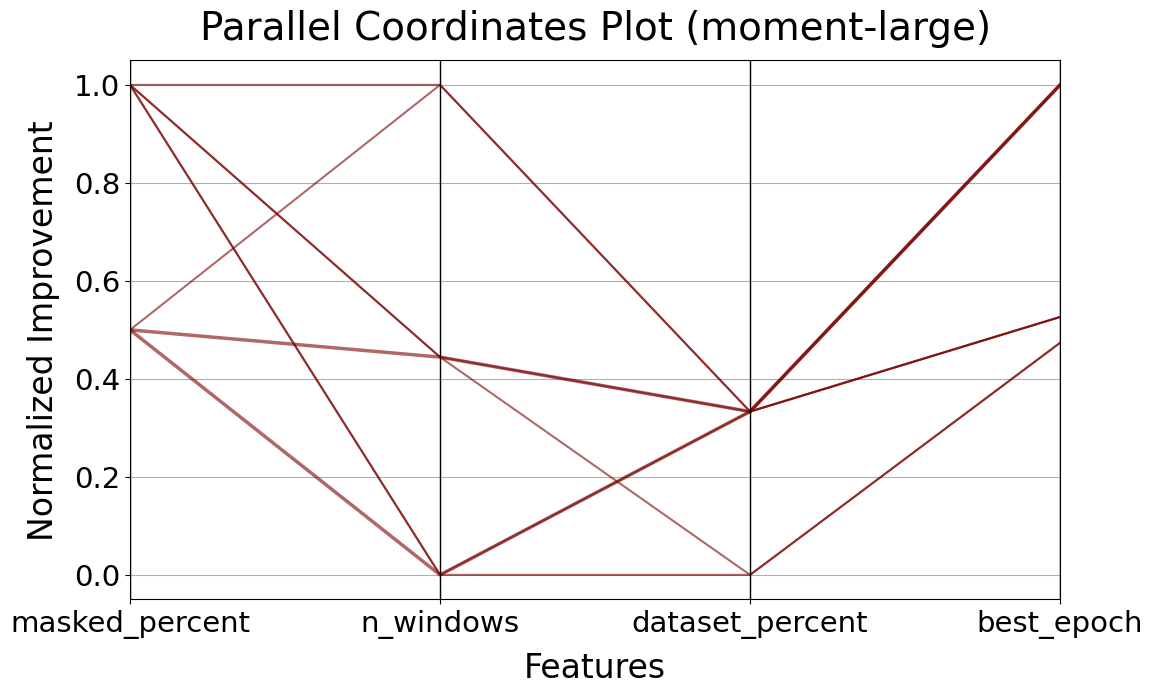

In [64]:
from sklearn.preprocessing import MinMaxScaler
def plot_parallel_coordinates(df_feat, save=True, save_path="parallel_coordinates", 
                              titlesize=18, title="Parallel Coordinates Plot - Influence of Features on Improvement"):
    """
    Generates a parallel coordinates plot highlighting the top 2 features with the highest improvement 
    and allows saving the image in SVG/PDF format.

    Parameters:
    - df_feat: DataFrame containing the feature importance data.
    - save: Boolean indicating whether to save the plot as SVG/PDF.
    - save_path: Base filename for saving the output (without extension).
    - titlesize: Font size for the title and labels.
    - title: Title of the plot.
    """

    # Normalize feature values
    df_feat_normalized = df_feat.copy()
    scaler = MinMaxScaler()
    df_feat_normalized[df_feat.columns] = scaler.fit_transform(df_feat[df_feat.columns])

    # Select top features based on improvement
    top_df = df_feat_normalized.nlargest(8, 'improvement')

    # Create colormap
    colormap = plt.cm.turbo
    norm = plt.Normalize(top_df['improvement'].min(), top_df['improvement'].max())
    colors = colormap(norm(top_df['improvement'].values))

    # Identify the two features with highest improvement (considering x-axis order)
    max_improvement = top_df['improvement'].max()
    candidates = top_df[top_df['improvement'] == max_improvement]
    if len(candidates) > 2:
        top_cases = candidates.nlargest(2, 'improvement').index
    else:
        top_cases = candidates.index

    # Create the parallel coordinates plot
    plt.figure(figsize=(12, 7))
    parallel_coordinates(
        top_df, 'improvement', color=colors, alpha=0.6
    )

    # Highlight the two most important cases
    for idx, case in enumerate(top_df.index):
        if case in top_cases:
            plt.gca().lines[idx].set_linewidth(2.5)  # Increase line thickness

    # Adjust labels and title
    plt.title(title, fontsize=titlesize, pad=15)
    plt.xlabel("Features", fontsize=titlesize * 0.85, labelpad=10)
    plt.ylabel("Normalized Improvement", fontsize=titlesize * 0.85, labelpad=10)
    plt.xticks(fontsize=titlesize * 0.75)#, rotation=45, ha="right")
    plt.yticks(fontsize=titlesize * 0.75)

    # Save the figure if requested
    if save:
        plt.savefig(f"{save_path}.svg", format='svg', transparent=True, bbox_inches='tight')
        plt.savefig(f"{save_path}.pdf", format='pdf', bbox_inches='tight')

        # Display interactive download links
        display(HTML(f'<a href="{save_path}.svg" download="{save_path}.svg">Download SVG</a>'))
        display(HTML(f'<a href="{save_path}.pdf" download="{save_path}.pdf">Download PDF</a>'))
    plt.legend().remove()
    plt.show()
    
# Example usage
plot_parallel_coordinates(df_feat, titlesize=28, title="Parallel Coordinates Plot (moment-large)")


In [65]:
pcnts = results_small["dataset_percent"].unique()
print(pcnts)
pcnts = (pcnts-pcnts.min())/(pcnts.max()-pcnts.min())
print(pcnts)

[0.15 0.2  0.3 ]
[0.         0.33333333 1.        ]


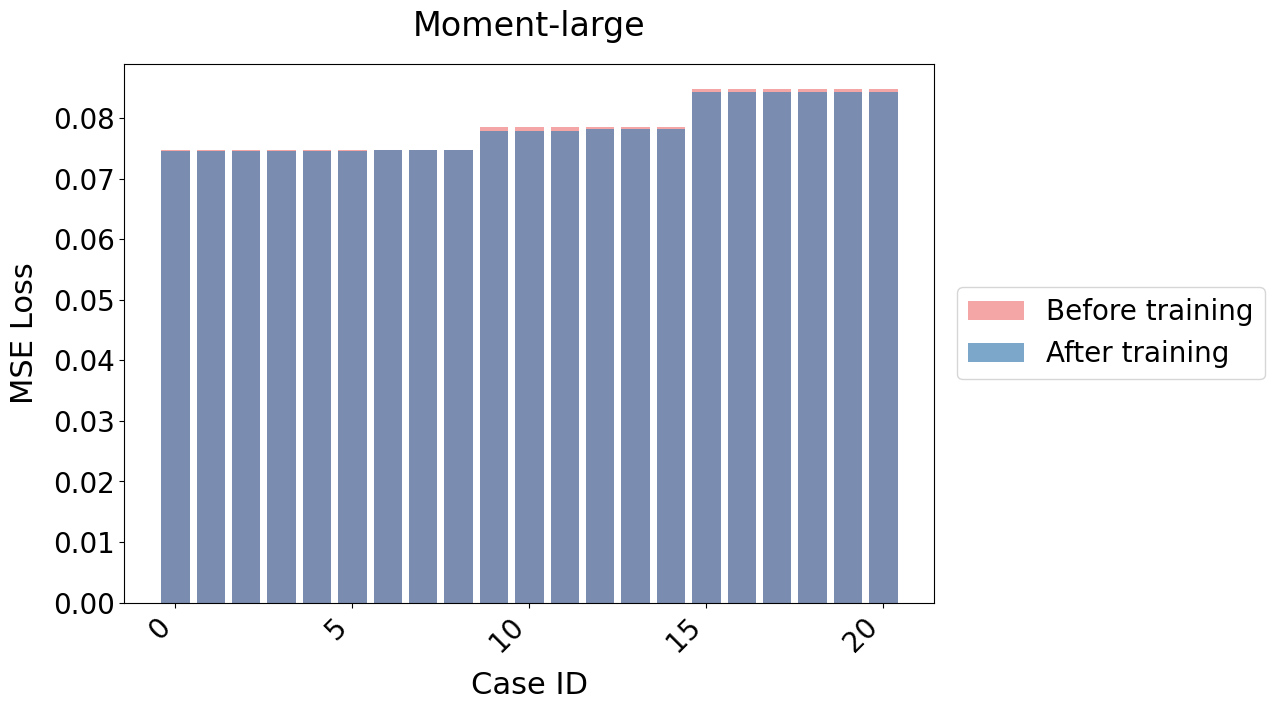

In [67]:
def plot_loss_comparison(
    df, 
    mvp_loss, 
    title="Comparison of Different Cases", 
    name="cases_comparison", 
    label_step=5,
    titlesize=16,
    plot_mvp=False,
    legend_position="top"  # Posiciones: "top", "bottom", "left", "right"
):
    """
    Genera un gráfico de comparación de pérdidas entre los diferentes casos en el dataset,
    con una línea horizontal indicando el valor de `mvp_loss`, mostrando `first_mse` y `last_mse`.

    Parámetros:
    - df: DataFrame con los casos a comparar.
    - mvp_loss: Valor de la pérdida de MVP para mostrar como referencia.
    - title: Título del gráfico.
    - name: Nombre del archivo para guardar la imagen.
    - label_step: Cada cuántos pasos mostrar una etiqueta en el eje X para mejorar la legibilidad.
    - plot_mvp: Si True, muestra una línea de referencia con `mvp_loss`.
    - legend_position: Posición de la leyenda ("top", "bottom", "left", "right").
    """
    plt.figure(figsize=(12, 7))
    
    # Ordenar por `last_mse`
    df_sorted = df.sort_values(by="last_mse").reset_index()

    # Posiciones de los casos en el eje X
    x_pos = np.arange(len(df_sorted))

    # Crear el gráfico de barras VERTICAL con `first_mse` y `last_mse`
    plt.bar(x_pos, df_sorted["first_mse"], color="lightcoral", label="Before training", alpha=0.7)
    plt.bar(x_pos, df_sorted["last_mse"], color="steelblue", label="After training", alpha=0.7)

    # Línea horizontal para `mvp_loss`
    if plot_mvp:
        plt.axhline(y=mvp_loss, color="red", linestyle="--", linewidth=2, label="MVP")

    # Ajustar etiquetas de los ejes
    plt.xlabel("Case ID", fontsize=titlesize-2, labelpad=10)
    plt.ylabel("MSE Loss", fontsize=titlesize-2, labelpad=10)
    plt.yticks(fontsize=titlesize-4)

    # Configurar etiquetas del eje X con inclinación
    xticks_labels = df_sorted.index
    plt.xticks(ticks=x_pos[::label_step], labels=xticks_labels[::label_step], rotation=45, fontsize=titlesize-4, ha="right")

    # Ajustar el título del gráfico
    plt.title(title, fontsize=titlesize, pad=20)

    # Configuración dinámica de la leyenda
    legend_positions = {
        "top":    {"loc": "upper center", "bbox_to_anchor": (0.5, 1.15), "ncol": 3, "adjust": {"top": 0.85}},
        "bottom": {"loc": "upper center", "bbox_to_anchor": (0.5, -0.15), "ncol": 3, "adjust": {"bottom": 0.2}},
        "left":   {"loc": "center left", "bbox_to_anchor": (-0.25, 0.5), "ncol": 1, "adjust": {"left": 0.2}},
        "right":  {"loc": "center right", "bbox_to_anchor": (1.425, 0.5), "ncol": 1, "adjust": {"right": 0.8}}
    }

    if legend_position not in legend_positions:
        raise ValueError("legend_position debe ser 'top', 'bottom', 'left' o 'right'.")

    legend_config = legend_positions[legend_position]
    plt.legend(fontsize=titlesize-4, loc=legend_config["loc"], bbox_to_anchor=legend_config["bbox_to_anchor"], ncol=legend_config["ncol"])
    plt.subplots_adjust(**legend_config["adjust"])  # Ajustar márgenes dinámicamente

    # Guardar en SVG y PDF
    save2svg_pdf(name)

    # Mostrar gráfico
    plt.show()
plot_loss_comparison(results_small, 0, title="Moment-large", name = "large_cases", titlesize=24, legend_position = "right")